# 1. 분류

## 머신러닝: 지도 학습과 비지도 학습

머신러닝: 컴퓨터가 스스로 학습할 수 있도록 도와주는 알고리즘이나 기술을 개발하는 분야
-> 알고리즘을 이용하여 데이터를 분석하고, 분석 결과를 스스로 학습하고 이를 토대로 판단이나 예측을 진행한다.

머신러닝의 종류
1) 지도 학습: 정답이 있는 데이터를 사용하여 학습시키는 것 -> 예측과 분류에 사용
2) 비지도 학습: 정답이 없는 데이터를 사용하여 학습시키는 것 -> 연관 규칙과 군집에 사용 (군집화, 밀도추정, 차원축소)
- 군집화: 변칙감지, 고객세분화 등 알고리즘이 식별해야 할 클러스터 수를 지정 또는 수정할 수 있으며, 이를 통해 그룹을 어디까지 세분화할 것인지 보다 쉽게 제어할 수 있다.
3) 강화 학습: 보상을 통해 상은 최대화, 벌은 최소화 하는 방향으로 학습시키는 것

지도 학습의 과정
1) labeled data: 독립변수와 종속변수가 모두 존재하는 데이터
2) labeled data를 training data와 test set으로 나눈다.
3) training set을 통해 모델을 학습한다. 이때, 독립변수를 통해 추정한 예측값이 주어진 종속변수와 같아지도록 모델을 훈련
4) test set에서 테스트한다.

지도 학습의 종류
1) 회귀: 주어진 데이터를 기반으로 정답을 맞추는 함수
2) 분류: 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것
- 회귀와 분류의 차이는 연속형 변수와 범주형 변수에 있다. 즉, 회귀는 연속형 변수를 예측할 때 사용되고, 분류는 범주형 변수를 예측할 때 사용한다.
- 로지스틱 회귀: 독립변수와 선형 관계성에 기반해 분류
- 결정 트리: 데이터 균일도에 따른 규칙 기반의 분류
- 서포트 벡터 머신: 개별 클래스 간의 최대 마진을 효과적으로 찾아 분류
- 최소 근접 알고리즘: 근접 거리 기준으로 분류

이진 분류와 다중 분류
이진 분류: 참 또는 거짓의 값만을 가지는 것으로 분류 (ex. 5가 맞다/아니다)
다중 분류: 예측하고자 하는 변수가 가질 수 있는 값이 3개 이상

# 2. 분류 모델

## 1. 로지스틱 회귀

로지스틱 회귀: 이진 분류 문제를 푸는 대표적인 알고리즘으로, 샘플이 특정 클래스에 속할 확률을 추정하는 것을 목표로 한다.
- 독립 변수의 선형 회귀에 로지스틱 함수를 적용하여 출력값을 0에서 1 사이로 변환해주는 것을 의미한다.
- 예를 들어, 환자가 특정 질병을 가지는지 아닌지 / 이메일이 스팸인지 아닌지 등...
- 이진 분류는 선형 회귀로 해결 할 수 없기 때문에 사용한다.

즉, 이진 분류는 값이 0 아니면 1의 형식으로 나타나기 때문에, 출력값이 0과 1 사이의 값을 가지면서 S자 형태로 그려지는 함수를 이용해야 하고, 그러한 함수가 '시그모이드 함수'이다.

시그모이드 함수: 0과 1 사이의 값을 가지면서 S자 형태로 그려지는 함수
- 입력값이 커지면 1에 수렵하고, 입력값이 작아지면 0에 수렴
- 출력값은 0부터 1까지의 값을 가짐

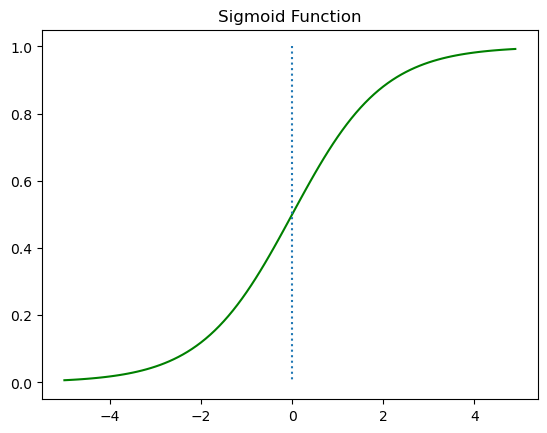

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

시그모이드 함수의 가중치: 인공지능이 하는 것은, 결국 주어진 데이터에 적합한 가중치 w와 b를 구하는 것이다.
- 가중치인 w 값이 커질 수록 0에서 1로 넘어가는 기울기가 가파르다.
- 가중치인 b 값이 커질 수록 0에서 1로 더 이른 값에서 이동한다.

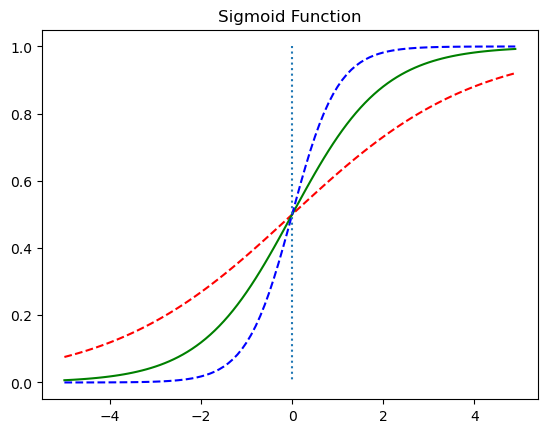

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

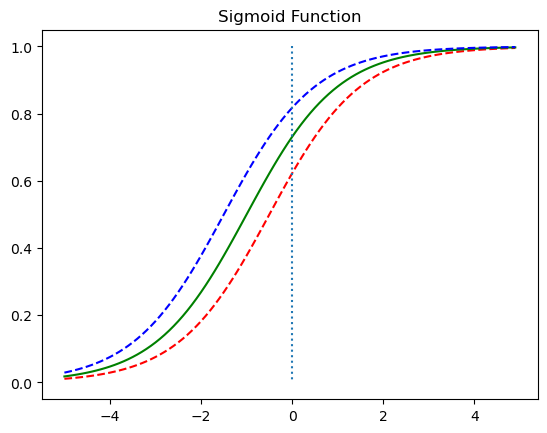

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

## 2. 결정 나무

결정 나무: 조건에 따라 데이터를 분류하여, 최종적으로 데이터가 순수한 label의 집합으로 구성될 때까지 분류를 반복하는 모델

결정 나무 용어
1) root node: 결정 나무가 시작되는 노드
2) edge: 노드와 노드를 연결하는 길목
3) leaf node: 결정 나무의 가장 마지막 노드로 모델에서 label에 해당
4) height(depth): tree의 깊이로, 클수록 tree의 구조가 복잡
5) level: 노드의 절대적 위계로 root node의 level이 0이고, leaf node의 level은 height-1
6) parent: 상대적으로 높은 위계의 노드
7) child: 상대적으로 낮은 위계의 노드
8) binary tree: tree 중에서 children이 최대 2개인 tree

CART(classification and regression tree) 알고리즘: 가장 대표적인 결정 나무 알고리즘으로, 데이터셋을 임계값을 기준으로 두 child로 나누는 알고리즘

이때, 임계값은 불순도(지니 계수)가 낮아지는 방향으로 나눠야 한다.

** 불순도?
불순도란, 분류하려는 데이터 집합에서 서로 다른 클래스가 섞여있는 정도를 의미한다. 그리고 CART알고리즘에서는 불순도를 확인하기 위해 "지니 계수'를 사용한다.

** 지니계수?
지니계수란 불순도를 나타내며, 통계적 분산 정도를 정량화해서 표현한 값으로 0과 1 사이의 값을 갖는다. 지니계수가 0일때 가장 순수도가 높다.

Gini 계수 = 1- (각 class 'i'의 비율의 제곱의 합)
따라서, class1의 비율이 50%, class2의 비율이 30%, class3의 비율이 20%라면,
Gini = 1 - (0.5^2+0.3^2+0.2^2) = 0.62이다.
지니계수는 모든 class가 동일한 비율로 존재하는 경우 최대값을 갖게 된다.

CART 알고리즘의 단계
1) 임계값 설정: 임계값을 기준으로 하여 데이터를 그룹으로 나눈다.
2) 불순도 감소 알고리즘: 분류 기준을 정확히 찾아야 클래스를 정확하게 구분해줄 수 있다. 즉, 불순도 알고리즘을 사용하여 현재 집단에 얼마 정도의 다른 객체들이 섞여있는지 확인하고, 불순도가 낮은 쪽으로 가지를 형성해 나가도록 한다.

** 그러나, CART 알고리즘은 당장의 지니계수를 낮추기 위해서 작동하므로 가장 효율적인 대안을 제시할 수 없다는 한계가 존재한다.

실제 학습 시 고려해야 할 것들: 모수 설정, 차이점 시각화, Prunning
1) parameter 설정
- min_samples_split: 분할되기 위해 노드가 가져야 하는 최소 샘플(데이터) 수
- min_samples_leaf: 리프 노드가 가지고 있어야 하는 최소 샘플 수
- min_weight_fraction_leaf: min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 비율
- max_leaf_nodes: 리프 노드의 최대 개수
- max_features: 각 노드에서 분할에 사용할 특성의 최대

2) 시각화: 시각화를 잘 수행함으로써 분류가 잘 이루어졌는지 확인할 수 있다.
- 규제가 없으면 과적합이 이루어질 수 있는데, min_samples_leaf 개수를 제어하면 적절히 분류되도록 할 수 있다.

3) prunning (가지치기) - 불필요한 노드 지우기
- 노드가 너무 많아지면 과적합이 될 가능성이 높으므로 하부 트리를 제거하여 일반화의 성능을 높일 수 있다.
- prunning을 통해 깊이를 줄어들고 결과의 개수를 줄일 수 있다.

## 3. 서포트 벡터 머신 (SVM)

서포트 벡터 머신: 클래스를 분류할 수 있는 다양한 경계선 중 최적의 라인을 찾아내는 알고리즘
- 명확하게 분류할 수 있는 데이터 집단에서 뛰어난 성능을 보이며, 고차원 공간에서도 효과적으로 사용이 가능하다.

SVM의 구성
1) support vector: 구분하는 선과 가장 가까운 포인트
2) decision boundary: 집단을 구분하는 선
3) margin: 선과 각 점의 거리

최적의 선을 찾는 방법?
- 결정 경계는 데이터로부터 가장 멀리 떨어져 있는 것이 좋다. 따라서, SVM은 margin이 가장 큰 경우를 선택하며 최적의 선을 찾는다.

## 4. KNN (K-Nearest Neighbor)

KNN의 가정 - 비슷한 특성을 가진 데이터끼리 서로 가까이 있다.
KNN: 데이터로부터 거리가 가까운 k개의 다른 데이터 레이블을 참조하여 분류하는 알고리즘
- k개의 이웃 설정 -> 가까운 k개의 데이터를 기반으로 분류

계산 순서
1) 데이터 준비
- KNN은 미리 학습하는 과정이 없기 때문에, 데이터를 준비하고, 각 데이터는 특정 벡터와 레이블(어떤 class인지)로 이루어진다.
2) K값 설정
- 원하는 K값을 설정한다. K는 가장 가까운 이웃의 개수를 나타내며, 보통 홀수개로 설정한다. (K를 짝수로 설정할 때 동점이 발생하는 경우를 방지하기 위함)
3) 거리 계산
- 새로운 데이터가 주어지면, 이 값과 기존 모든 데이터 간의 거리를 계산한다.
- 이때 유클리드 거리, 맨해튼 거리 등을 사용한다.
4) 가장 가까운 K개의 이웃 선택
- 계산된 거리 중에서 가장 작은 거리 값을 가진 K개의 데이터를 선택한다.
5) 분류하기
- K개의 이웃 중 가장 많이 등장하는 클래스가 예측 결과가 된다.

장점
1) 훈련이 필요하지 않음
2) 정보의 손실이 없음

단점
1) 쿼리를 처리하는 데에 시간이 오래 걸린다. (KNN은 사전 학습을 한 모델을 사용하는 것이 아니라, 그때그때 계산을 통해 가장 가까운 점들을 구하기 때문!)
2) 이상치에 큰 영향을 받는다. (각 데이터와의 거리에 기반해서 분류하는 모델이기 때문!)

## [참고] 앙상블

앙상블: 여러 개의 개별 분류 모델들을 결합해 하나의 분류 모델보다 더 좋은 성능을 내는 머신러닝 기법

앙상블의 종류
1) 보팅(voting): 다른 알고리즘의 모델을 병렬로 사용
2) 배깅(bagging): 동일 알고리즘의 모델을 병렬로 사용
3) 부스팅(Boosting): 동일 알고리즘의 모델을 직렬(순차적)로 사용

# 3. 분류 평가 지표

## 1. 혼동 행렬

혼동 행렬: 분류 모델의 예측 결과를 정확한 예측과 잘못된 예측으로 구분하여 나타낸 표

True Positive: 실제로 참, 참으로 예측
True Negative: 실제로 거짓, 거짓으로 예측
False Positive: 실제로 거짓, 참으로 예측
False Negative: 실제로 참, 거짓으로 예측 

=> 일단 True로 시작하면 예측이 맞음! / 뒤가 positive면 참으로 예측, negative면 거짓으로 예측

혼동 행렬을 이용한 분류 모델 평가 지표
1) 정확도: 모든 가능한 예측 중 참인 비율 (모델이 입력된 데이터에 대해 얼마나 정확하게 예측하는지를 나타낸다.)
- 모든 가능한 예측 중 참인 비율: (TP+TN)/(TP+TN+FP+FN)
- 단점: 정답 레이블의 비율이 불균형하면 모델의 정확도를 신뢰할 수 없다.

2) 정밀도
- TP / (TP+FP)
- 예측을 참이라고 한 경우의 실제 '참'의 비율
- 거짓을 참으로 판단한 정도를 알 수 있다.
- 정밀도가 높을수록, 거짓을 참으로 예측한 정도가 낮다.

3) 재현도
- TP / (TP+FN)
- 실제 참이라고 한 경우 중에서 예측을 참이라고 한 비율
- 참을 거짓으로 판단한 정도를 알 수 있다.
- 재현도가 높을수록 참을 거짓으로 예측한 정도가 낮다.

예시1 - 암 환자 판단
- 암 환자 판단의 경우, 실제로 암인데, 암이 아니라고 예측하는 경우가 가장 치명적이다. 즉, FN (거짓으로 예측했지만, 실제로는 참인 경우)를 줄여야 하므로, 재현도를 높여야 한다.
- 재현도 (RECALL)을 높이기 위해서는 Threshold를 낮춰야 한다. threshold가 0.5이면 모델은 예측값이 0.5 이상일 때를 참으로 예측하는데, threshold가 낮아지면, 그만큼 모델이 참으로 예측하는 경우가 많아지게 된다. recall은 실제 참인 것 중에서 참이라고 예측한 것의 비율이기 때문에 threshold를 낮추면 자연스럽게 증가하게 된다.

예측2 - 스팸 메일 분류기
- 스팸 메일의 경우, 스팸이 아닌 메일을 스팸이라고 분류하는 경우 (FP)가 치명적이다. 따라서 이때는 정밀도를 높여야 한다.
- 이때, precision을 높이기 위해서는 threshold를 높여야 한다.

** Precision(정밀도)와 Recall(재현도)의 trade-off 관계
- 분류를 할 때, 확률에 기반하여 threshold가 넘으면 참, 미만이면 거짓으로 판단한다.
- 따라서, 이 경곗값을 조정하면 precision과 recall을 조정할 수 있다.
- 경곗값을 낮춤 -> positive 예측이 늘어남 -> recall은 올라가고, precision은 낮아진다.
- 경곗값을 높임 -> positive 예측이 줄어듦 -> recall은 낮아지고, precision은 높아진다.

정밀도&재현도 그래프
- 정밀도와 재현드의 그래프에서 두 value값이 만나는 지점을 threshold로 정하면, 예측 오류를 최소화할 수 있다.
- 그래프에서 각 점은 분류 모델이 해당 임계값에서 precision과 recall 값을 어떻게 예측했는지를 보여준다.

## 2. F1-score

F1-score: 정밀도와 재현율의 조화 평균
- precision(정밀도)와 recall(재현율) 간의 균형을 효과적으로 평가하기 위해서 사용한다.

## 3. ROC / AUC Curve

ROC Curve: 얼마나 분류가 잘 되었는가를 보여주는 그래프
- True Positive Rate (TPR): 참인 것들 중 참이라고 예측한 비율 (recall)
- False Positive Rate (FPR): 거짓인 것들 중 참이라고 "잘못" 예측한 비율
- 어떻게 분류를 해도 만족할 수 없는 부분이 생기기 때문에 현실적인 한계를 고려하여 적절히 타협한 최적의 ROC Curve를 찾아야 한다.

AUC Curve: ROC와 x축 사이의 면적(적분값)
- 0에서 1 사이의 값을 가지며, 1에 가까울수록 분류 성능이 좋은 것이다.

## 4. 다중 분류 평가 지표

위의 분류 평가 지표는 모두 이진 분류 평가지표이다. 다중 분류 평가 지표의 경우에는, 이진 분류 평가 지표를 사용하여 클래스별로 점수를 구한 뒤, 이를 적절히 평균을 내리는 것이다.

# 4. 하이퍼파라미터 최적화

## 1. 하이퍼파라미터 최적화

하이퍼파라미터: 학습 전에 사용자가 직접 설정한은 변수
하이퍼파라미터 최적화: 적절한 하이퍼파라미터를 찾아 모델의 성능을 향상시키는 것

최적화 과정
1) 하이퍼파라미터 탐색 범위를 설정 (최적 값을 찾고 싶은 하이퍼파라미터의 범위를 설정)
2) 평가 지표 계산 함수 정의 (탐색하려는 하이퍼파라미터를 인수로 받아 평가지표 값을 계산해주는 함수를 정의)
3) 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 검증 데이터로 정확도 평가
4) 위 단계를 반복하여 정확도 결과를 보고 하이퍼파라미터의 범위를 좁힘

## 2. 하이퍼파라미터 최적화 방법

1. Grid Search: 정해진 범위에서 하이퍼파라미터를 모두 순회하여 가장 좋은 성능을 내는 값을 찾는 방법
- 장점: 범위가 넓고 step이 작을수록 꼼꼼하게 전 범위를 탐색하여 최적해를 정확히 찾을 수 있다.
- 단점: 시간이 너무 오래 걸린다.
- 적용: 넓은 범위, 큰 step을 활용해 범위를 좁힌다.

2. Random Search: 정해진 범위에서 하이퍼파라미터를 무작위로 탐색해 가장 좋은 성능을 내는 값을 찾는 기법
- 장점: 속도가 grid search보다 빠르다.
- 단점: 무작위라는 한계 때문에 정확도가 떨어진다. 따라서 사용 빈도가 적다.

3. Bayesian Optimization: 사전 정보를 바탕으로 최적 하이퍼파라미터 값을 확률적으로 추정하여 탐색하는 기법
- 특징: gausain process라는 통계학을 기반으로 만들어진 모델로, 여러 개의 하이퍼파라미터들에 대해서 aquisition function을 적용했을 때, 가장 큰 값이 나올 확률이 높은 지점을 찾아낸다.